# Mass Spring Damper Example
<img src="fig/msd.png" alt="Drawing" style="width: 500px;" align="center"/>

The equation of motion is given as:

$m \ddot{x}(t) + c \dot{x}(t) + k x(t) = u(t)$

You are given the following physical parameters.
* c=2 N/(m/s)
* k=2 N/m
* m=1 kg

## Laplace Method for Matrix Exponential

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import sympy

sympy.init_printing()
t = sympy.symbols('t', real=True)
s = sympy.symbols('s')
c = 1
k = 1

A = sympy.Matrix([[0, 1], [-k, -c]])
B = sympy.Matrix([[0], [1]])
C = sympy.Matrix([[1, 0]])
D = sympy.Matrix([[0]])
(A, B, C, D)

⎛⎡0   1 ⎤  ⎡0⎤             ⎞
⎜⎢      ⎥, ⎢ ⎥, [1  0], [0]⎟
⎝⎣-1  -1⎦  ⎣1⎦             ⎠

$G(s) = C(sI - A)^{-1}B + D$

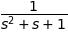

In [21]:
N = (s*sympy.eye(2) - A).inv()
G = (C*N*B + D).expand()
G.simplify()
G = G[0]
G

Remember from the Laplace table:

$\mathcal{L}^{-1}\left[ \dfrac{1}{s - a} \right] = e^{at}$

The same is true for the matrix version of this Laplace transform:

$\mathcal{L}^{-1}\left[ (sI- A)^{-1} \right] = e^{At}$

In [12]:
eAt = sympy.inverse_laplace_transform((s*sympy.eye(2) - A).inv(), s, t)
eAt

⎡                               -t                              -t            
⎢                               ───                             ───           
⎢   ⎛   ⎛√3⋅t⎞         ⎛√3⋅t⎞⎞   2                               2     ⎛√3⋅t⎞ 
⎢√3⋅⎜sin⎜────⎟ + √3⋅cos⎜────⎟⎟⋅ℯ   ⋅Heaviside(t)          2⋅√3⋅ℯ   ⋅sin⎜────⎟⋅
⎢   ⎝   ⎝ 2  ⎠         ⎝ 2  ⎠⎠                                         ⎝ 2  ⎠ 
⎢───────────────────────────────────────────────          ────────────────────
⎢                       3                                                3    
⎢                                                                             
⎢             -t                                                              
⎢             ───                                                             
⎢              2     ⎛√3⋅t⎞                          ⎛     ⎛√3⋅t⎞         ⎛√3⋅
⎢      -2⋅√3⋅ℯ   ⋅sin⎜────⎟⋅Heaviside(t)          √3⋅⎜- sin⎜────⎟ + √3⋅cos⎜───
⎢                    ⎝ 2  ⎠                         

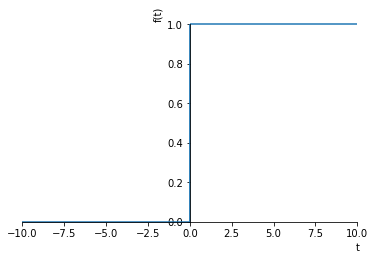

In [4]:
sympy.plot(sympy.Heaviside(t))

In [5]:
sympy.Matrix.exp(A*t)*sympy.Heaviside(t)

⎡⎛       ⎛   ⎛  1   √3⋅ⅈ⎞⎞                                     ⎞              
⎢⎜       ⎜ t⋅⎜- ─ + ────⎟⎟                                     ⎟              
⎢⎜       ⎜   ⎝  2    2  ⎠⎟                                     ⎟              
⎢⎜       ⎜ℯ              ⎟       -t               -t           ⎟              
⎢⎜  √3⋅im⎜───────────────⎟       ───              ───          ⎟              
⎢⎜       ⎜     1   √3⋅ⅈ  ⎟        2     ⎛√3⋅t⎞     2     ⎛√3⋅t⎞⎟              
⎢⎜       ⎜   - ─ + ────  ⎟   √3⋅ℯ   ⋅sin⎜────⎟   ℯ   ⋅cos⎜────⎟⎟              
⎢⎜       ⎝     2    2    ⎠              ⎝ 2  ⎠           ⎝ 2  ⎠⎟              
⎢⎜- ────────────────────── + ───────────────── + ──────────────⎟⋅Heaviside(t) 
⎢⎝            3                      6                 2       ⎠              
⎢                                                                             
⎢                                                                             
⎢                                                   

## Spectral Method for Matrix Exponential

The approach here will be to use the diagonalization of A.

In [6]:
A

⎡0   1 ⎤
⎢      ⎥
⎣-1  -1⎦

In [7]:
evects = sympy.Matrix.eigenvects(A)
evects

⎡⎛               ⎡⎡  -1    ⎤⎤⎞  ⎛               ⎡⎡  -1    ⎤⎤⎞⎤
⎢⎜               ⎢⎢────────⎥⎥⎟  ⎜               ⎢⎢────────⎥⎥⎟⎥
⎢⎜  1   √3⋅ⅈ     ⎢⎢1   √3⋅ⅈ⎥⎥⎟  ⎜  1   √3⋅ⅈ     ⎢⎢1   √3⋅ⅈ⎥⎥⎟⎥
⎢⎜- ─ - ────, 1, ⎢⎢─ + ────⎥⎥⎟, ⎜- ─ + ────, 1, ⎢⎢─ - ────⎥⎥⎟⎥
⎢⎜  2    2       ⎢⎢2    2  ⎥⎥⎟  ⎜  2    2       ⎢⎢2    2  ⎥⎥⎟⎥
⎢⎜               ⎢⎢        ⎥⎥⎟  ⎜               ⎢⎢        ⎥⎥⎟⎥
⎣⎝               ⎣⎣   1    ⎦⎦⎠  ⎝               ⎣⎣   1    ⎦⎦⎠⎦

$T = \left[ \xi_1 \xi_2 \right]$

Diagonolization:

$ A = T diag(\lambda_1, \lambda_2) T^{-1}$

In [13]:
T = sympy.Matrix.hstack(evects[0][2][0], evects[1][2][0])
T

⎡  -1        -1    ⎤
⎢────────  ────────⎥
⎢1   √3⋅ⅈ  1   √3⋅ⅈ⎥
⎢─ + ────  ─ - ────⎥
⎢2    2    2    2  ⎥
⎢                  ⎥
⎣   1         1    ⎦

In [14]:
T_inv = T.inv()
T_inv.simplify()
T_inv

⎡-√3⋅ⅈ   1   √3⋅ⅈ⎤
⎢──────  ─ - ────⎥
⎢  3     2    6  ⎥
⎢                ⎥
⎢ √3⋅ⅈ   1   √3⋅ⅈ⎥
⎢ ────   ─ + ────⎥
⎣  3     2    6  ⎦

In [15]:
Lambda = sympy.diag(evects[0][0], evects[1][0])
Lambda

⎡  1   √3⋅ⅈ            ⎤
⎢- ─ - ────      0     ⎥
⎢  2    2              ⎥
⎢                      ⎥
⎢              1   √3⋅ⅈ⎥
⎢    0       - ─ + ────⎥
⎣              2    2  ⎦

Let's check that our diagonalization of A worked as expected.

In [16]:
A_check = (T*Lambda*T.inv())
sympy.expand(A_check, complex=True), A

⎛⎡0   1 ⎤  ⎡0   1 ⎤⎞
⎜⎢      ⎥, ⎢      ⎥⎟
⎝⎣-1  -1⎦  ⎣-1  -1⎦⎠

We can calculate the exponential of the diagonal matrix containing the eigen values, it is just the exponential of each element of the diagonal.

In [17]:
LambdaExp = sympy.diag(sympy.exp(evects[0][0]*t), sympy.exp(evects[1][0]*t))
LambdaExp

⎡   ⎛  1   √3⋅ⅈ⎞                 ⎤
⎢ t⋅⎜- ─ - ────⎟                 ⎥
⎢   ⎝  2    2  ⎠                 ⎥
⎢ℯ                       0       ⎥
⎢                                ⎥
⎢                    ⎛  1   √3⋅ⅈ⎞⎥
⎢                  t⋅⎜- ─ + ────⎟⎥
⎢                    ⎝  2    2  ⎠⎥
⎣       0         ℯ              ⎦

In [18]:
eAt_spec = (T*LambdaExp*T_inv).expand(complex=True)*sympy.Heaviside(t)
eAt_spec

⎡⎛    -t                            ⎞                              -t         
⎢⎜    ───                           ⎟                              ───        
⎢⎜     2     ⎛√3⋅t⎞    -t           ⎟                               2     ⎛√3⋅
⎢⎜√3⋅ℯ   ⋅sin⎜────⎟    ───          ⎟                        2⋅√3⋅ℯ   ⋅sin⎜───
⎢⎜           ⎝ 2  ⎠     2     ⎛√3⋅t⎞⎟                                     ⎝ 2 
⎢⎜───────────────── + ℯ   ⋅cos⎜────⎟⎟⋅Heaviside(t)           ─────────────────
⎢⎝        3                   ⎝ 2  ⎠⎠                                       3 
⎢                                                                             
⎢              -t                                   ⎛      -t                 
⎢              ───                                  ⎜      ───                
⎢               2     ⎛√3⋅t⎞                        ⎜       2     ⎛√3⋅t⎞    -t
⎢       -2⋅√3⋅ℯ   ⋅sin⎜────⎟⋅Heaviside(t)           ⎜  √3⋅ℯ   ⋅sin⎜────⎟    ──
⎢                     ⎝ 2  ⎠                        

In [19]:
eAt

⎡                               -t                              -t            
⎢                               ───                             ───           
⎢   ⎛   ⎛√3⋅t⎞         ⎛√3⋅t⎞⎞   2                               2     ⎛√3⋅t⎞ 
⎢√3⋅⎜sin⎜────⎟ + √3⋅cos⎜────⎟⎟⋅ℯ   ⋅Heaviside(t)          2⋅√3⋅ℯ   ⋅sin⎜────⎟⋅
⎢   ⎝   ⎝ 2  ⎠         ⎝ 2  ⎠⎠                                         ⎝ 2  ⎠ 
⎢───────────────────────────────────────────────          ────────────────────
⎢                       3                                                3    
⎢                                                                             
⎢             -t                                                              
⎢             ───                                                             
⎢              2     ⎛√3⋅t⎞                          ⎛     ⎛√3⋅t⎞         ⎛√3⋅
⎢      -2⋅√3⋅ℯ   ⋅sin⎜────⎟⋅Heaviside(t)          √3⋅⎜- sin⎜────⎟ + √3⋅cos⎜───
⎢                    ⎝ 2  ⎠                         

## Response given initial conditions

$\vec{x} = \begin{bmatrix}x  \\ \dot{x} \end{bmatrix}$

$\vec{x}(t) = e^{At}\vec{x}(0) + \int_0^t e^{A(t - \tau)}  B u(\tau) d\tau$

$\vec{y}(t) = C \vec{x}(t) + D\vec{u}(t)$

In [15]:
x0 = sympy.Matrix([1, 0])
x0

⎡1⎤
⎢ ⎥
⎣0⎦

In [16]:
x = eAt*x0
x

⎡                   -t             ⎤
⎢(sin(t) + cos(t))⋅ℯ  ⋅Heaviside(t)⎥
⎢                                  ⎥
⎢        -t                        ⎥
⎣    -2⋅ℯ  ⋅sin(t)⋅Heaviside(t)    ⎦

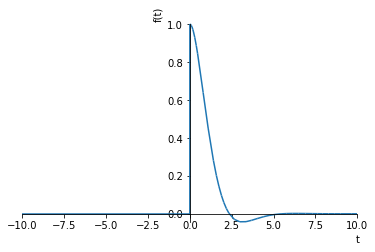

In [17]:
sympy.plot(x[0])

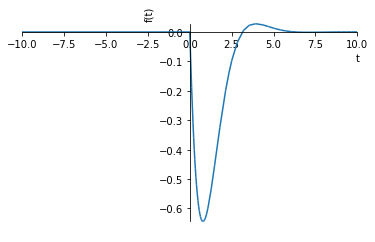

In [18]:
sympy.plot(x[1])

# Final Value Theorem

$G(s) = Y(s)/U(s)$

$\lim\limits_{t \rightarrow \infty} x(t) = \lim\limits_{s \rightarrow 0} s X(s)$

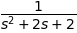

In [19]:
G

## Unit step of magnitude  3

$ X = G\cdot U$

$ X = (X/U)\cdot U$

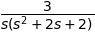

In [20]:
U1 = 3/s
X1 = G*U1
X1

In [21]:
u1 = sympy.inverse_laplace_transform(U1, s, t)
u1

In [22]:
x1_final = (s*X1).subs(s, 0)
x1_final

In [23]:
x1 = sympy.inverse_laplace_transform(X1, s, t).expand(complex=True)
x1

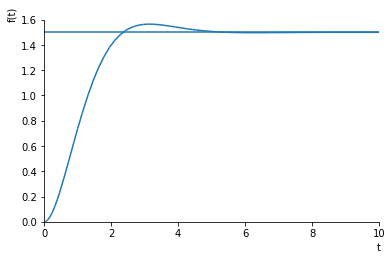

In [24]:
sympy.plot(x1, x1_final, (t, 0, 10))

## Impulse of magnitude 2

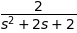

In [25]:
U2 = 2
X2 = G*U2
X2

In [26]:
u2 = sympy.inverse_laplace_transform(U2, s, t)
u2

In [27]:
x2_final = (s*X2).subs(s, 0)
x2_final

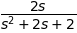

In [28]:
s*X2

In [29]:
x2 = sympy.inverse_laplace_transform(X2, s, t).expand(complex=True)
x2

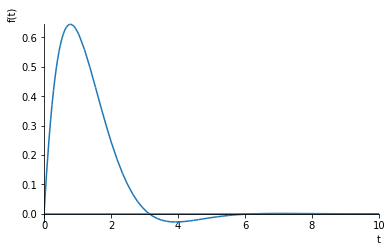

In [30]:
sympy.plot(x2, x2_final, (t, 0, 10))